# Sequential testing
A common issue with classical A/B-tests, especially when you want to be able to detect small differences, is that the sample size needed can be prohibitively large. In many cases it can take several weeks, months or even years to collect enough data to conclude a test. 

### Write a function to feach data.

In [568]:
from datetime import timedelta
import math
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sprt
#Adding scripts path
import os, sys
sys.path.insert(0,'../scripts/')
#rom plots import visualize
#helper = visualize()

In [569]:
#pip install sprt

In [570]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('max_column', None)
df = pd.read_csv('../data/AdSmartABdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [571]:
# control yes count
control_yes = df.query('experiment == "control"').yes
control_len = len(control_yes)
control_yes_len = control_yes.sum(axis=0)

# exposed yes count
exposed_yes = df.query('experiment == "exposed"').yes
exposed_len = len(exposed_yes)
exposed_yes_len = exposed_yes.sum(axis=0)

In [572]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [573]:
# copying dataframe
response = df.copy(deep=True)

In [574]:
# getting users who only selects yes or no
response = response[response['yes'] == 1].append(response[response['no'] == 1])

In [575]:
# finding the control group
control_df = response[response['experiment'] == 'control']

In [576]:
# finding the exposed group
exposed_df = response[response['experiment'] == 'exposed']

- removing yes and no columns and replace it with response

In [577]:
#Control group
# yes = 1 and No = 0
df_yes = control_df[control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df_yes['response'] = 1
df_no = control_df[control_df['no'] == 1].drop(['yes','no'], axis = 1)
df_no['response'] = 0
control_plot_df = df1.append(df2).reset_index(drop=True)
control_plot_df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
2,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
3,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
4,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1
5,0587d2d4-d47a-4872-ace2-a460eea468f3,exposed,2020-07-09,1,Generic Smartphone,6,Chrome Mobile,1
6,07567ef2-71de-41c4-b234-79565a48917e,exposed,2020-07-08,20,Generic Smartphone,6,Chrome Mobile WebView,1
7,07659c1c-f6f0-4a6b-8089-97290c26aeb9,exposed,2020-07-08,6,Generic Smartphone,6,Chrome Mobile,1
8,08097cbe-a8fe-4336-a917-3da665c5654e,exposed,2020-07-10,15,Generic Smartphone,6,Chrome Mobile,1
9,086f31fc-fc25-4c4b-b0ba-ea9ac9502855,exposed,2020-07-08,20,Generic Smartphone,6,Chrome Mobile,1


In [578]:
#Exposed Group
#yes = 1 and No = 0
df_yes = exposed_df[exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df_yes['response'] = 1
df_no = exposed_df[exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df_no['response'] = 0
exposed_plot_df = df1.append(df2).reset_index(drop=True)
exposed_plot_df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
2,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
3,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
4,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1
5,0587d2d4-d47a-4872-ace2-a460eea468f3,exposed,2020-07-09,1,Generic Smartphone,6,Chrome Mobile,1
6,07567ef2-71de-41c4-b234-79565a48917e,exposed,2020-07-08,20,Generic Smartphone,6,Chrome Mobile WebView,1
7,07659c1c-f6f0-4a6b-8089-97290c26aeb9,exposed,2020-07-08,6,Generic Smartphone,6,Chrome Mobile,1
8,08097cbe-a8fe-4336-a917-3da665c5654e,exposed,2020-07-10,15,Generic Smartphone,6,Chrome Mobile,1
9,086f31fc-fc25-4c4b-b0ba-ea9ac9502855,exposed,2020-07-08,20,Generic Smartphone,6,Chrome Mobile,1


- Total of control data group by responses

In [579]:
# count control data
control_yes_data = control_plot_df.groupby(['response']).agg({'response': ['count']})
control_yes_data.columns = ['count']
control_yes_data = control_yes_data.reset_index()
control_yes_data

,response,count
0,0,349
1,1,308


- Total of Exposed data group by responses

In [580]:
# count exposed data
exposed_yes_data = exposed_plot_df.groupby(['response']).agg({'response': ['count']})
exposed_yes_data.columns = ['count']
exposed_yes_data = exposed_yes_data.reset_index()
exposed_yes_data

,response,count
0,0,349
1,1,308


### Exposed Group

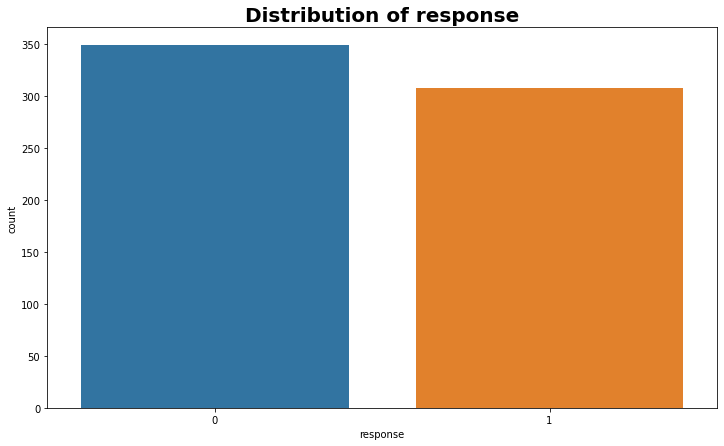

In [581]:
# yes and no response for exposed group
visualize.plot_count(exposed_plot_df, 'response')

### Control Group

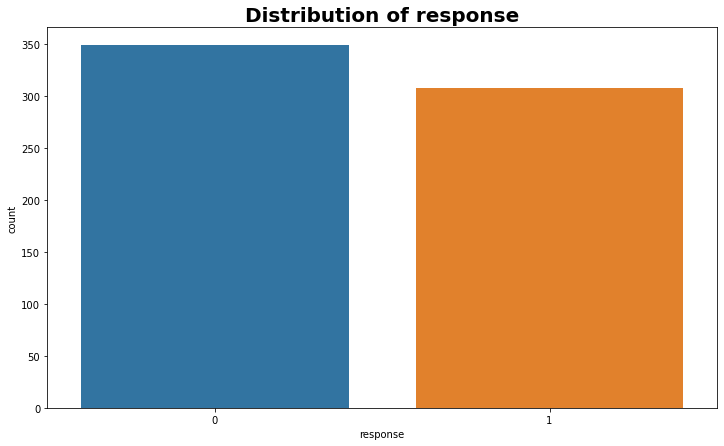

In [582]:
# yes and no response for control group
visualize.plot_count(control_plot_df, 'response')

###    The lower number of errors we require, the larger sample size we need.
* The smaller the difference we want to detect, the larger sample size is required.

Sequential sampling works in a very non-traditional way; instead of a fixed sample size, you choose one item (or a few) at a time, and then test your hypothesis. You can either:

* Reject the null hypothesis (H0) in favor of the alternate hypothesis (H1) and stop,
* Keep the null hypothesis and stop,
* unable to reach either conclusion with current observation and continue sampling.

- setting alpha and beta.
- setting up the scikit learn pipeline to chain the transformers.

In [583]:
# Null value
h0 = control_yes_count/control_count
# Alternative value
h1 = exposed_yes_count/exposed_count
# Type I error
alpha = 0.05
# Type II 
beta = 0.10
odd_ratio = 1.01
# Values
values = np.random.binomial(1, h1, 100)
test = sprt.SPRTBinomial(h0 = h0, h1 = h1, alpha = alpha, beta = beta, values = values)

Decision:	Continue

     values  lower   upper
n                         
91       13 -5.854  22.212
92       13 -5.783  22.282
93       13 -5.713  22.353
94       13 -5.642  22.424
95       13 -5.571  22.495
96       13 -5.501  22.565
97       13 -5.430  22.636
98       13 -5.359  22.707
99       13 -5.289  22.777
100      13 -5.218  22.848


- Binomial Distribution

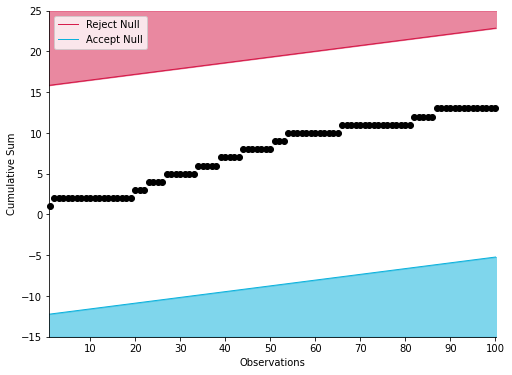

In [584]:
test.plot()

=======================//================================


### Advantage of Sequential testing over classic a/b testing


*   optimize necessary observation (sample size)
*   reduce the likelihood of error
* gives a chance to finish experiments earlier without increasing the possibility of false results

**N.B: Unlike classical fixed sample-size tests, where significance is only checked after all samples have been collected, this test will continously check for significance at every new sample and stop the test as soon as a significant result is detected, while still guaranteeing the same type-1 and type-2 errors as the fixed-samplesize test.**

**N.B: This test completely ignores the number of failures in each group, which makes it significantly easier to implement in low-conversion settings. However**
- **If we hit the threshold without having reached statistical proof, we cannot continue the experiment.**
- **Even if preliminary evidence says that one version is terrible, we will keep losing conversions until we hit an arbitrarly pre-agreed threshold.**
